In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import seaborn as sns

# Đọc file CSV
df_pairs = pd.read_csv('../../data/clean/clean_resumes_v2.csv')

print(f"Số lượng Candidate Resumes và JD: {len(df_pairs)}")

Số lượng Candidate Resumes và JD: 1192320


In [2]:
df_pairs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192320 entries, 0 to 1192319
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   cr_id                 1192320 non-null  object
 1   jd_id                 1192320 non-null  object
 2   cr_category           1192320 non-null  object
 3   jd_name               1192320 non-null  object
 4   primary_skills_jd     1192320 non-null  object
 5   secondary_skills_jd   1192320 non-null  object
 6   adjectives_jd         1192320 non-null  object
 7   adverbs_jd            1192320 non-null  object
 8   primary_skills_cr     1192320 non-null  object
 9   secondary_skills_cr   1192320 non-null  object
 10  adjectives_cr         1192320 non-null  object
 11  adverbs_cr            1192320 non-null  object
 12  adjectives_weight_cr  1192320 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 118.3+ MB


In [3]:

# Hàm chuyển đổi an toàn: xử lý cả chuỗi và danh sách
def safe_literal_eval(val):
    if isinstance(val, list):
        return val
    if pd.isna(val):
        return []
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError):
        return []
def jaccard_similarity(list1, list2):
    def normalize_tokens(lst):
        return set([str(x).strip().lower() for x in lst if str(x).strip()])

    set1, set2 = normalize_tokens(list1), normalize_tokens(list2)

    set1, set2 = set(list1), set(list2)
    return len(set1 & set2) / len(set1 | set2) if set1 | set2 else 0

def assign_suitability(score):
    if score > 0.6:
        return 'Most Suitable'          # Top 25%
    elif score > 0.1:
        return 'Moderately Suitable'    # Khoảng giữa
    else:
        return 'Not Suitable'




In [4]:
print(jaccard_similarity(['python'],['python']))

1.0


In [5]:
pd.DataFrame(df_pairs)

,cr_id,jd_id,cr_category,jd_name,primary_skills_jd,secondary_skills_jd,adjectives_jd,adverbs_jd,primary_skills_cr,secondary_skills_cr,adjectives_cr,adverbs_cr,adjectives_weight_cr
0,CANDIDATE_0,JOB_0,Data Science,MLops Engineer,"['python', 'java', 'javascript', 'tensorflow',...","['computer vision', 'backend', 'mobile', 'data...","['abnormal', 'tiny', 'qualified', 'novel', 'sm...",[],"['python', 'computer vision', 'javascript', 'g...","['kibana', 'tableau', 'jquery', 'random forest...","['identifiable', 'trivial', 'inbuilt', 'differ...","['personally', 'plotly', 'well', 'frequently']",37
1,CANDIDATE_0,JOB_1,Data Science,"Senior DevOps Engineer (Cloud, AWS)","['python', 'bash', 'aws', 'ci cd', 'devops', '...","['automation', 'aws', 'software', 'devops', 'd...","['good', 'main', 'periodic', 'advanced', 'idea...","['effectively', 'quickly', 'occasionally', 'in...","['python', 'git', 'systems', 'docker']","['kibana', 'computer vision', 'tableau', 'jque...","['identifiable', 'trivial', 'inbuilt', 'differ...","['personally', 'plotly', 'well', 'frequently']",37
2,CANDIDATE_0,JOB_2,Data Science,VTS - Chuyên Viên Quản Trị Dự Án (Agile/ Azure),"['software', 'sales']","['software', 'network', 'project manager']","['specific', 'responsible', 'logical', 'import...","['currently', 'directly', 'clearly']",[],"['python', 'kibana', 'computer vision', 'table...","['identifiable', 'trivial', 'inbuilt', 'differ...","['personally', 'plotly', 'well', 'frequently']",37
3,CANDIDATE_0,JOB_4,Data Science,"VHT - Embedded Software Engineer (Linux, C++)","['c', 'linux']","['mobile', 'network', 'security', 'embedded', ...","['vietnamese', 'high', 'military', 'peripheral...",[],[],"['python', 'kibana', 'computer vision', 'table...","['identifiable', 'trivial', 'inbuilt', 'differ...","['personally', 'plotly', 'well', 'frequently']",37
4,CANDIDATE_0,JOB_5,Data Science,Quality Assurance Manager (QAM),"['cicd', 'power bi', 'software', 'qa', 'produc...","['cicd', 'power bi', 'software', 'qa', 'produc...","['capable', 'internal', 'agile', 'new', 'comme...","['internationally', 'proficiently']",['qa'],"['python', 'kibana', 'computer vision', 'table...","['identifiable', 'trivial', 'inbuilt', 'differ...","['personally', 'plotly', 'well', 'frequently']",37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192315,CANDIDATE_825,JOB_2505,DotNet Developer,Nhân Viên Thiết Kế Đồ Họa/ Graphic Designer,"['software', 'illustrator', 'photoshop']","['designer', 'sales', 'illustrator', 'photoshop']","['offline', 'decorative', 'good', 'basic', 'gr...","['closely', 'right', 'independently']",[],"['sql', 'sql server', 'html', 'css']","['net', 'semi', 'intra', 'english', 'cultural']",[],5
1192316,CANDIDATE_825,JOB_2506,DotNet Developer,Graphic & Motion Designer,"['illustrator', 'photoshop', 'adobe photoshop'...","['illustrator', 'photoshop']","['high', 'compulsory', 'equivalent', 'graphic'...","['right', 'online']",[],"['sql', 'sql server', 'html', 'css']","['net', 'semi', 'intra', 'english', 'cultural']",[],5
1192317,CANDIDATE_825,JOB_2507,DotNet Developer,Chuyên Graphic Designer,"['illustrator', 'photoshop']",['designer'],"['right', 'equivalent', 'dynamic', 'relevant',...","['right', 'online', 'proficiently']",[],"['sql', 'sql server', 'html', 'css']","['net', 'semi', 'intra', 'english', 'cultural']",[],5
1192318,CANDIDATE_825,JOB_2510,DotNet Developer,Nhân Viên Thiết Kế Đồ Họa,"['software', 'typography', 'illustrator', 'pho...",['sales'],"['offline', 'decorative', 'dynamic', 'graphic'...","['right', 'independently', 'closely', 'online'...",[],"['sql', 'sql server', 'html', 'css']","['net', 'semi', 'intra', 'english', 'cultural']",[],5


In [6]:
import ast
def to_list_safe(val):
    """Trả về list; chấp nhận list thật, NaN, hoặc chuỗi '[...]'."""
    if isinstance(val, list):
        return val
    if pd.isna(val):
        return []
    val = str(val).strip()
    if val.startswith('[') and val.endswith(']'):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError):
            return []
    if val == '':
        return []
    return [v.strip() for v in val.split('|')]  # Fallback: chuỗi 'python|sql'

def to_set_lower(lst):
    """Chuyển list → frozenset token lowercase, bỏ rỗng."""
    return frozenset(str(x).strip().lower() for x in lst if str(x).strip())
def to_set_lower(lst):
    """Chuyển list → frozenset token lowercase, bỏ rỗng."""
    return frozenset(str(x).strip().lower() for x in lst if str(x).strip())

def jaccard(a, b):
    """Tính Jaccard cho hai tập hợp (hoặc list)."""
    if not a and not b:
        return 0.0
    if not isinstance(a, set):
        a = set(a)
    if not isinstance(b, set):
        b = set(b)
    return len(a & b) / len(a | b)

In [7]:
list_cols = [ 
    'primary_skills_jd', 'secondary_skills_jd', 'adjectives_jd', 'adverbs_jd',
    'primary_skills_cr', 'secondary_skills_cr', 'adjectives_cr', 'adverbs_cr'
]

for col in list_cols:
    df_pairs[col]      = df_pairs[col].apply(to_list_safe)
    df_pairs[col + '_set'] = df_pairs[col].apply(to_set_lower)

In [8]:
df_pairs['primary_sim'] = [
    jaccard(a, b) for a, b in zip(df_pairs['primary_skills_jd_set'],
                                  df_pairs['primary_skills_cr_set'])
]

df_pairs['secondary_sim'] = [
    jaccard(a, b) for a, b in zip(df_pairs['secondary_skills_jd_set'],
                                  df_pairs['secondary_skills_cr_set'])
]

df_pairs['adj_sim'] = [
    jaccard(a, b) for a, b in zip(df_pairs['adjectives_jd_set'],
                                  df_pairs['adjectives_cr_set'])
]

In [35]:
df_pairs['adj_weight'] = df_pairs['adjectives_weight_cr'].fillna(
    df_pairs['adjectives_cr_set'].apply(len)
)

df_pairs['total_similarity'] = (
    df_pairs['primary_sim']
  + df_pairs['secondary_sim']
  + df_pairs['adj_sim'] * np.log1p(df_pairs['adj_weight'])
)

df_pairs['suitability'] = np.select(
    [df_pairs['total_similarity'] >= 0.6 ,
     df_pairs['total_similarity'] >= 0.3],
    ['Most Suitable', 'Moderately Suitable'],
    default='Not Suitable'
)

In [10]:
np.log1p(7)

np.float64(2.0794415416798357)

In [11]:
df_similarity = df_pairs.drop_duplicates(subset=[
    'primary_sim',
    'secondary_sim',
    'adj_sim',
    'adj_weight',
])


In [36]:
df_similarity = df_similarity.drop_duplicates(subset=['jd_id', 'cr_id'])
# Reset index nếu muốn
df_similarity.reset_index(drop=True, inplace=True)

In [37]:
pd.DataFrame(df_similarity)

,cr_id,jd_id,cr_category,jd_name,primary_skills_jd,secondary_skills_jd,adjectives_jd,adverbs_jd,primary_skills_cr,secondary_skills_cr,adjectives_cr,adverbs_cr,adjectives_weight_cr,primary_sim,secondary_sim,adj_sim,adj_weight,total_similarity,suitability
0,CANDIDATE_0,JOB_0,Data Science,MLops Engineer,"[python, java, javascript, tensorflow, pytorch...","[computer vision, backend, mobile, data scient...","[abnormal, tiny, qualified, novel, smooth, bas...",[],"[python, computer vision, javascript, git, jav...","[kibana, tableau, jquery, random forest, knn, ...","[identifiable, trivial, inbuilt, different, ou...","[personally, plotly, well, frequently]",37,0.538462,0.000000,0.000000,37,0.538462,1
1,CANDIDATE_0,JOB_1,Data Science,"Senior DevOps Engineer (Cloud, AWS)","[python, bash, aws, ci cd, devops, devops engi...","[automation, aws, software, devops, devops eng...","[good, main, periodic, advanced, ideal, techni...","[effectively, quickly, occasionally, independe...","[python, git, systems, docker]","[kibana, computer vision, tableau, jquery, mac...","[identifiable, trivial, inbuilt, different, ou...","[personally, plotly, well, frequently]",37,0.173913,0.047619,0.016393,37,0.281165,0
2,CANDIDATE_0,JOB_2,Data Science,VTS - Chuyên Viên Quản Trị Dự Án (Agile/ Azure),"[software, sales]","[software, network, project manager]","[specific, responsible, logical, important, te...","[currently, directly, clearly]",[],"[python, kibana, computer vision, tableau, jqu...","[identifiable, trivial, inbuilt, different, ou...","[personally, plotly, well, frequently]",37,0.000000,0.000000,0.000000,37,0.000000,0
3,CANDIDATE_0,JOB_4,Data Science,"VHT - Embedded Software Engineer (Linux, C++)","[c, linux]","[mobile, network, security, embedded, systems]","[vietnamese, high, military, peripheral, civil...",[],[],"[python, kibana, computer vision, tableau, jqu...","[identifiable, trivial, inbuilt, different, ou...","[personally, plotly, well, frequently]",37,0.000000,0.048780,0.020000,37,0.121532,0
4,CANDIDATE_0,JOB_5,Data Science,Quality Assurance Manager (QAM),"[cicd, power bi, software, qa, production, svn...","[cicd, power bi, software, qa, production, com...","[capable, internal, agile, new, commercial, pr...","[internationally, proficiently]",[qa],"[python, kibana, computer vision, tableau, jqu...","[identifiable, trivial, inbuilt, different, ou...","[personally, plotly, well, frequently]",37,0.111111,0.000000,0.021277,37,0.188507,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33975,CANDIDATE_825,JOB_2200,DotNet Developer,Senior Full-Stack Engineering Manager,"[backend, frontend]","[javascript, ui ux, sql, azure sql, automation...","[oral, innovative, open, comfortable, post, fr...","[consistently, functionally, additionally, con...",[],"[sql, sql server, html, css]","[net, semi, intra, english, cultural]",[],5,0.000000,0.037037,0.013889,5,0.061923,0
33976,CANDIDATE_825,JOB_2272,DotNet Developer,Technical Leader (Cobol Techlead),[cobol],"[python, java, cobol, spring boot, sql, aws, s...","[good, intensive, proficient, practical, exper...","[effectively, right, online, seamlessly]",[],"[sql, sql server, html, css]","[net, semi, intra, english, cultural]",[],5,0.000000,0.076923,0.033333,5,0.136648,0
33977,CANDIDATE_825,JOB_2320,DotNet Developer,Bridge Software Engineer - Remote,"[python, java, c, sql, nosql, software, database]","[python, java, javascript, golang, react, angu...","[innovative, friendly, technical, dynamic, pro...",[],[sql],"[sql server, css, html]","[net, semi, intra, english, cultural]",[],5,0.142857,0.074074,0.000000,5,0.216931,0
33978,CANDIDATE_825,JOB_2355,DotNet Developer,Java Developer Lead,"[java, mysql, api]","[java, sql, mysql, postgresql, restful, backen...","[large, diverse, urban, good, social, adjacent...","[fully, quickly]",[],"[sql, sql server, html, css]","[net, semi, intra, english, cultural]",[],5,0.000000,0.062500,0.125000,5,0.286470,0


In [38]:
df_similarity.describe()

,adjectives_weight_cr,primary_sim,secondary_sim,adj_sim,adj_weight,total_similarity,suitability
count,33980.000000,33980.000000,33980.000000,33980.000000,33980.000000,33980.000000,33980.000000
mean,25.759417,0.237101,0.061716,0.044768,25.759417,0.437869,0.799823
std,16.993399,0.304390,0.065990,0.032573,16.993399,0.320552,0.781085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.023810,16.000000,0.206039,0.000000
50%,22.000000,0.142857,0.052632,0.040000,22.000000,0.344268,1.000000
75%,33.000000,0.333333,0.090909,0.062500,33.000000,0.568040,1.000000
max,79.000000,1.000000,1.000000,0.333333,79.000000,2.010689,2.000000


In [15]:
df_similarity.drop(columns=[c + '_set' for c in list_cols], inplace=True)

In [16]:
df_similarity.dropna(inplace=True)

In [17]:
df_similarity.to_csv('../csv/jd_cr_similarity.csv', index=False)

In [32]:
df_similarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33980 entries, 0 to 33979
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cr_id                 33980 non-null  object 
 1   jd_id                 33980 non-null  object 
 2   cr_category           33980 non-null  object 
 3   jd_name               33980 non-null  object 
 4   primary_skills_jd     33980 non-null  object 
 5   secondary_skills_jd   33980 non-null  object 
 6   adjectives_jd         33980 non-null  object 
 7   adverbs_jd            33980 non-null  object 
 8   primary_skills_cr     33980 non-null  object 
 9   secondary_skills_cr   33980 non-null  object 
 10  adjectives_cr         33980 non-null  object 
 11  adverbs_cr            33980 non-null  object 
 12  adjectives_weight_cr  33980 non-null  int64  
 13  primary_sim           33980 non-null  float64
 14  secondary_sim         33980 non-null  float64
 15  adj_sim            

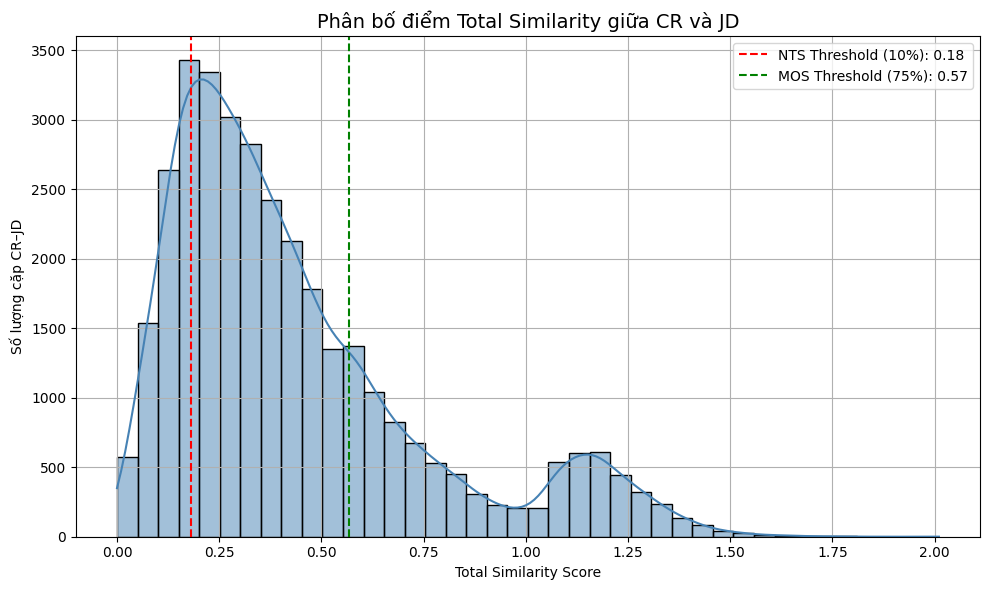

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu đồ họa
plt.figure(figsize=(10, 6))
sns.histplot(df_similarity['total_similarity'], bins=40, kde=True, color='steelblue')

# Đánh dấu phân vị nếu bạn dùng để gán nhãn
threshold_nts = df_similarity['total_similarity'].quantile(0.2)
threshold_mos = df_similarity['total_similarity'].quantile(0.75)

# Vẽ đường phân biệt ngưỡng suitability
plt.axvline(threshold_nts, color='red', linestyle='--', label=f'NTS Threshold (10%): {threshold_nts:.2f}')
plt.axvline(threshold_mos, color='green', linestyle='--', label=f'MOS Threshold (75%): {threshold_mos:.2f}')

plt.title('Phân bố điểm Total Similarity giữa CR và JD', fontsize=14)
plt.xlabel('Total Similarity Score')
plt.ylabel('Số lượng cặp CR–JD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Phân bố nhãn Suitability:
suitability
0    14447
1    11888
2     7645
Name: count, dtype: int64

Tổng số cặp JD-CR: 33980


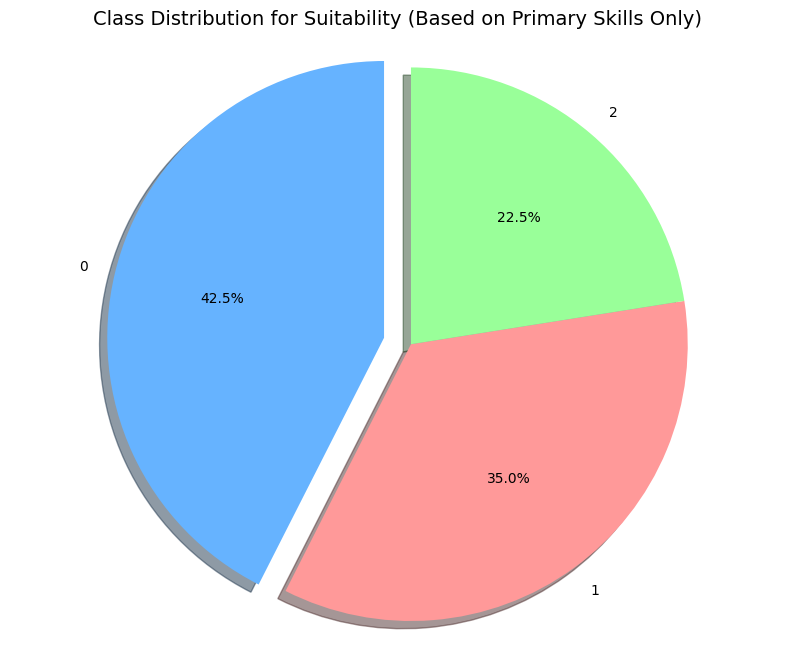


=== SUMMARY ===
Total similarity pairs: 33980
Match rate: 0.00%
Neutral rate: 0.00%
Mismatch rate: 0.00%


In [41]:

# Kiểm tra phân bố nhãn
class_counts = df_similarity['suitability'].value_counts()
print("\nPhân bố nhãn Suitability:")
print(class_counts)
print(f"\nTổng số cặp JD-CR: {len(df_similarity)}")


# Tạo explode động cho biểu đồ
labels = class_counts.index
sizes = class_counts.values
colors = ['#66b3ff', '#ff9999', '#99ff99'][:len(labels)]
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Class Distribution for Suitability (Based on Primary Skills Only)', fontsize=14)
plt.axis('equal')
plt.savefig('class_distribution_suitability.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== SUMMARY ===")
print(f"Total similarity pairs: {len(df_similarity)}")
print(f"Match rate: {(class_counts.get('Match', 0) / len(df_similarity) * 100):.2f}%")
print(f"Neutral rate: {(class_counts.get('Neutral', 0) / len(df_similarity) * 100):.2f}%")
print(f"Mismatch rate: {(class_counts.get('Mismatch', 0) / len(df_similarity) * 100):.2f}%")

In [21]:
df_similarity['suitability'] = df_similarity['suitability'].map({
    'Not Suitable': 0,
    'Moderately Suitable': 1,
    'Most Suitable': 2
})


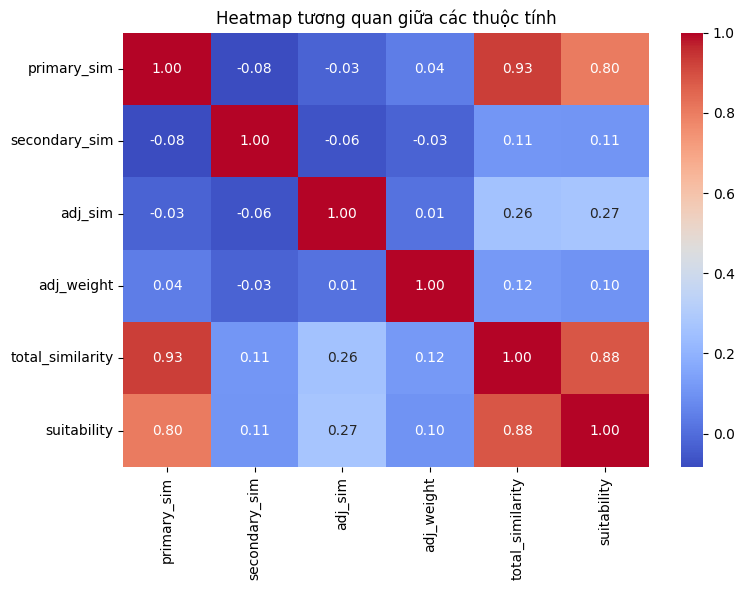

In [42]:
corr = df_similarity[['primary_sim', 'secondary_sim', 'adj_sim', 'adj_weight', 'total_similarity','suitability']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap tương quan giữa các thuộc tính")
plt.tight_layout()
plt.show()


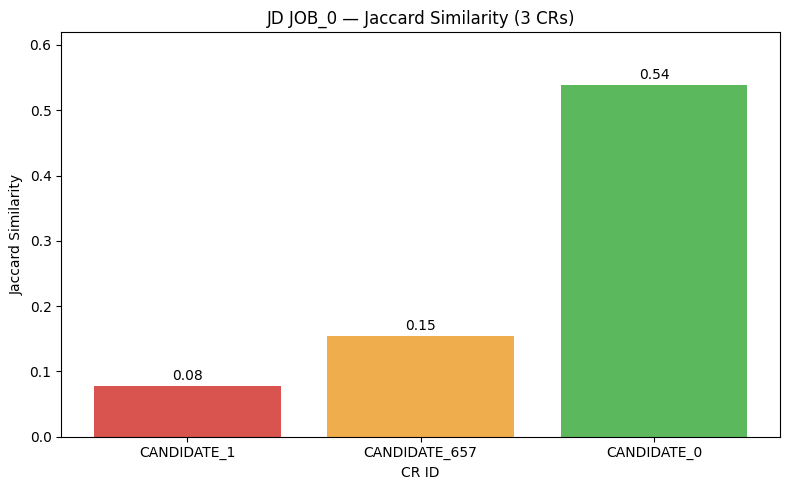

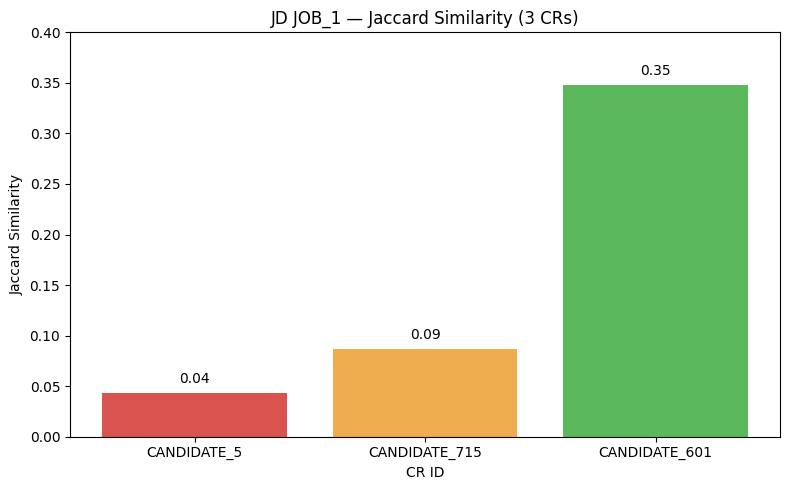

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

jd_ids = ['JOB_0', 'JOB_1']
results = []

for jd_id in jd_ids:
    subset = df_similarity.loc[df_similarity['jd_id'] == jd_id,
                               ['cr_id', 'primary_sim']]

    # Sắp xếp tăng và lọc bỏ 0
    subset_pos = subset[subset['primary_sim'] > 0].sort_values('primary_sim')

    if subset_pos.empty:          # Không có CR nào > 0
        continue

    # ---- lấy thấp nhất, trung vị, cao nhất ----
    lowest  = subset_pos.iloc[0]
    median  = subset_pos.iloc[len(subset_pos)//2]         # thực sự 50 %
    highest = subset_pos.iloc[-1]

    # Bảo đảm 3 CR khác nhau (phòng TH giá trị trùng)
    top3 = pd.DataFrame([lowest, median, highest]).drop_duplicates('cr_id')

    # Nếu bị trùng mà chỉ còn 2 → lấy thêm CR gần nhất chưa chọn
    while len(top3) < 3 and len(subset_pos) > len(top3):
        extra = subset_pos[~subset_pos['cr_id'].isin(top3['cr_id'])].iloc[0]
        top3 = pd.concat([top3, extra.to_frame().T])

    top3['jd_id'] = jd_id
    results.append(top3)

# Gộp kết quả
df_plot = pd.concat(results, ignore_index=True)

# ─────────── Vẽ: mỗi JD một biểu đồ ───────────
colors = ['#d9534f', '#f0ad4e', '#5cb85c']     # đỏ - cam - xanh

for jd_id in jd_ids:
    df_sub = df_plot[df_plot['jd_id'] == jd_id]

    if df_sub.empty:
        print(f'JD {jd_id} không có CR similarity > 0')
        continue

    plt.figure(figsize=(8, 5))
    plt.bar(df_sub['cr_id'], df_sub['primary_sim'], color=colors[:len(df_sub)])
    plt.title(f'JD {jd_id} — Jaccard Similarity (3 CRs)')
    plt.xlabel('CR ID')
    plt.ylabel('Jaccard Similarity')

    for i, v in enumerate(df_sub['primary_sim']):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

    plt.ylim(0, df_sub['primary_sim'].max()*1.15)      # thêm khoảng trống ghi số
    plt.tight_layout()
    plt.show()


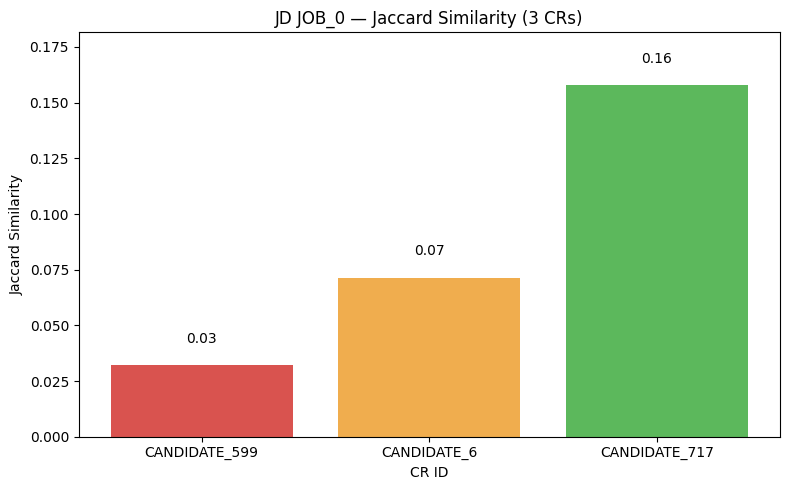

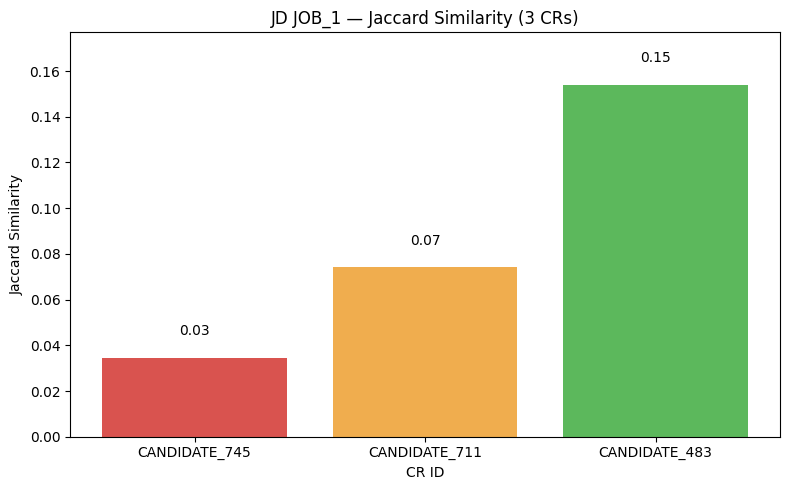

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

jd_ids = ['JOB_0', 'JOB_1']
results = []

for jd_id in jd_ids:
    subset = df_similarity.loc[df_similarity['jd_id'] == jd_id,
                               ['cr_id', 'secondary_sim']]

    # Sắp xếp tăng và lọc bỏ 0
    subset_pos = subset[subset['secondary_sim'] > 0].sort_values('secondary_sim')

    if subset_pos.empty:          # Không có CR nào > 0
        continue

    # ---- lấy thấp nhất, trung vị, cao nhất ----
    lowest  = subset_pos.iloc[0]
    median  = subset_pos.iloc[len(subset_pos)//2]         # thực sự 50 %
    highest = subset_pos.iloc[-1]

    # Bảo đảm 3 CR khác nhau (phòng TH giá trị trùng)
    top3 = pd.DataFrame([lowest, median, highest]).drop_duplicates('cr_id')

    # Nếu bị trùng mà chỉ còn 2 → lấy thêm CR gần nhất chưa chọn
    while len(top3) < 3 and len(subset_pos) > len(top3):
        extra = subset_pos[~subset_pos['cr_id'].isin(top3['cr_id'])].iloc[0]
        top3 = pd.concat([top3, extra.to_frame().T])

    top3['jd_id'] = jd_id
    results.append(top3)

# Gộp kết quả
df_plot = pd.concat(results, ignore_index=True)

# ─────────── Vẽ: mỗi JD một biểu đồ ───────────
colors = ['#d9534f', '#f0ad4e', '#5cb85c']     # đỏ - cam - xanh

for jd_id in jd_ids:
    df_sub = df_plot[df_plot['jd_id'] == jd_id]

    if df_sub.empty:
        print(f'JD {jd_id} không có CR similarity > 0')
        continue

    plt.figure(figsize=(8, 5))
    plt.bar(df_sub['cr_id'], df_sub['secondary_sim'], color=colors[:len(df_sub)])
    plt.title(f'JD {jd_id} — Jaccard Similarity (3 CRs)')
    plt.xlabel('CR ID')
    plt.ylabel('Jaccard Similarity')

    for i, v in enumerate(df_sub['secondary_sim']):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

    plt.ylim(0, df_sub['secondary_sim'].max()*1.15)      # thêm khoảng trống ghi số
    plt.tight_layout()
    plt.show()


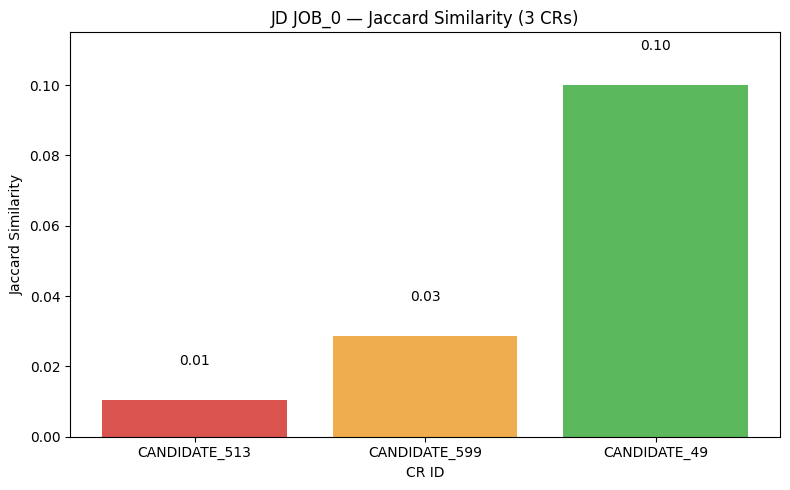

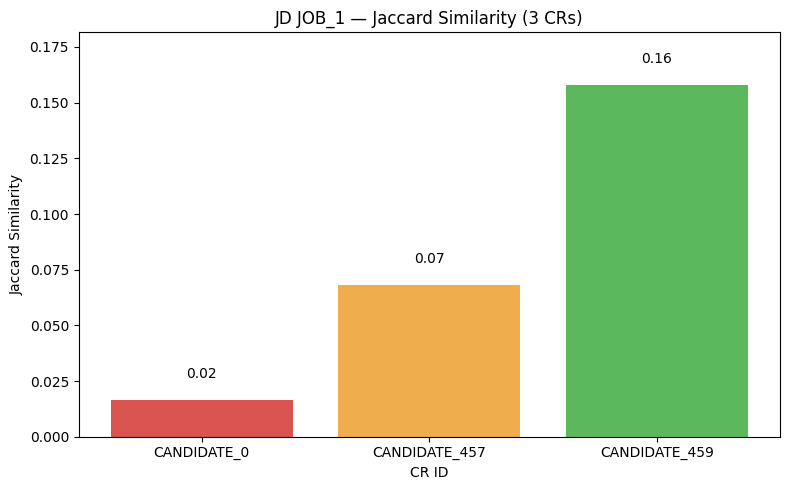

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

jd_ids = ['JOB_0', 'JOB_1']
results = []

for jd_id in jd_ids:
    subset = df_similarity.loc[df_similarity['jd_id'] == jd_id,
                               ['cr_id', 'adj_sim']]

    # Sắp xếp tăng và lọc bỏ 0
    subset_pos = subset[subset['adj_sim'] > 0].sort_values('adj_sim')

    if subset_pos.empty:          # Không có CR nào > 0
        continue

    # ---- lấy thấp nhất, trung vị, cao nhất ----
    lowest  = subset_pos.iloc[0]
    median  = subset_pos.iloc[len(subset_pos)//2]         # thực sự 50 %
    highest = subset_pos.iloc[-1]

    # Bảo đảm 3 CR khác nhau (phòng TH giá trị trùng)
    top3 = pd.DataFrame([lowest, median, highest]).drop_duplicates('cr_id')

    # Nếu bị trùng mà chỉ còn 2 → lấy thêm CR gần nhất chưa chọn
    while len(top3) < 3 and len(subset_pos) > len(top3):
        extra = subset_pos[~subset_pos['cr_id'].isin(top3['cr_id'])].iloc[0]
        top3 = pd.concat([top3, extra.to_frame().T])

    top3['jd_id'] = jd_id
    results.append(top3)

# Gộp kết quả
df_plot = pd.concat(results, ignore_index=True)

# ─────────── Vẽ: mỗi JD một biểu đồ ───────────
colors = ['#d9534f', '#f0ad4e', '#5cb85c']     # đỏ - cam - xanh

for jd_id in jd_ids:
    df_sub = df_plot[df_plot['jd_id'] == jd_id]

    if df_sub.empty:
        print(f'JD {jd_id} không có CR similarity > 0')
        continue

    plt.figure(figsize=(8, 5))
    plt.bar(df_sub['cr_id'], df_sub['adj_sim'], color=colors[:len(df_sub)])
    plt.title(f'JD {jd_id} — Jaccard Similarity (3 CRs)')
    plt.xlabel('CR ID')
    plt.ylabel('Jaccard Similarity')

    for i, v in enumerate(df_sub['adj_sim']):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

    plt.ylim(0, df_sub['adj_sim'].max()*1.15)      # thêm khoảng trống ghi số
    plt.tight_layout()
    plt.show()


In [26]:
print(df_similarity['suitability'].value_counts())
print(df_similarity['suitability'].value_counts(normalize=True))


suitability
0    14447
1    11888
2     7645
Name: count, dtype: int64
suitability
0    0.425162
1    0.349853
2    0.224985
Name: proportion, dtype: float64


In [27]:
df_similarity.to_csv('../csv/jd_cr_similarity.csv', index=False)